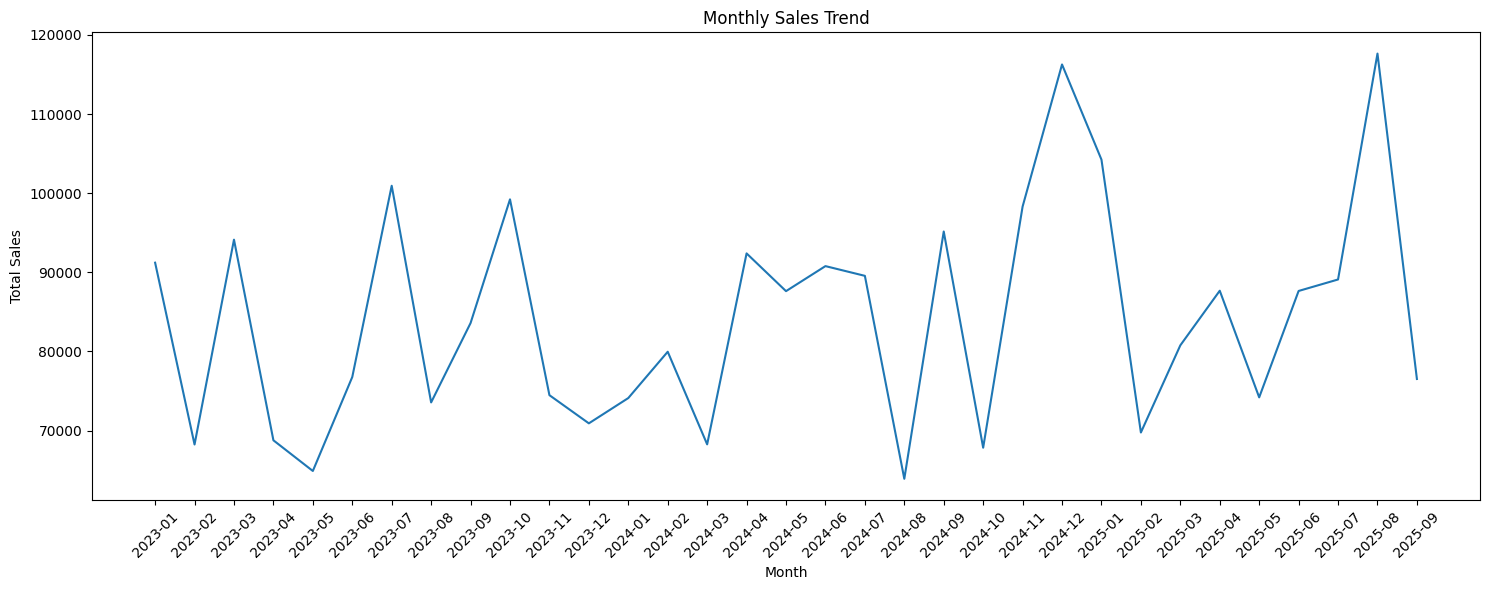

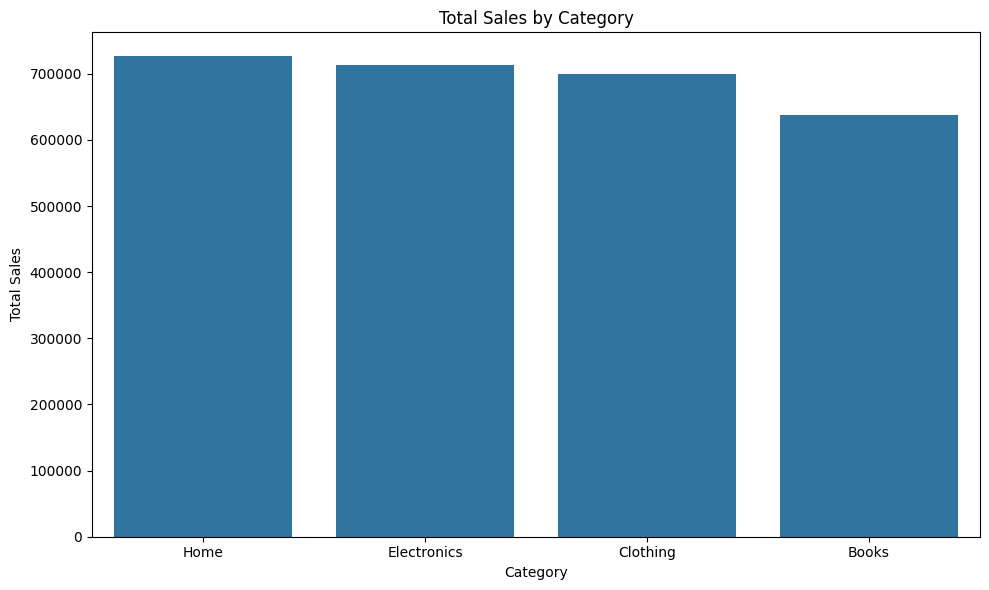

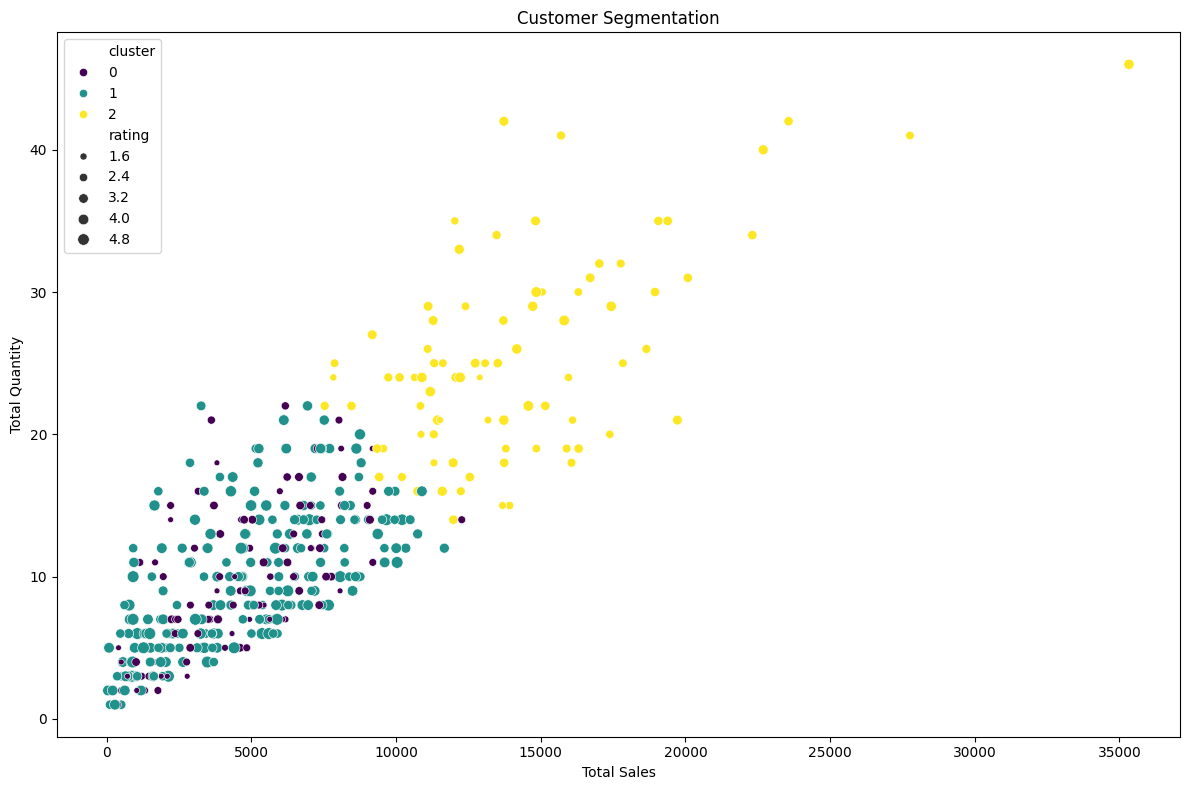

Regression Model Coefficients:
Price (β₁): 5.48
Rating (β₂): -35.09
Quantity (β₃): 494.53
Intercept (β₀): -2579.45
R-squared: 0.8590
Mean Squared Error: 698488.62
Root Mean Squared Error: 835.76


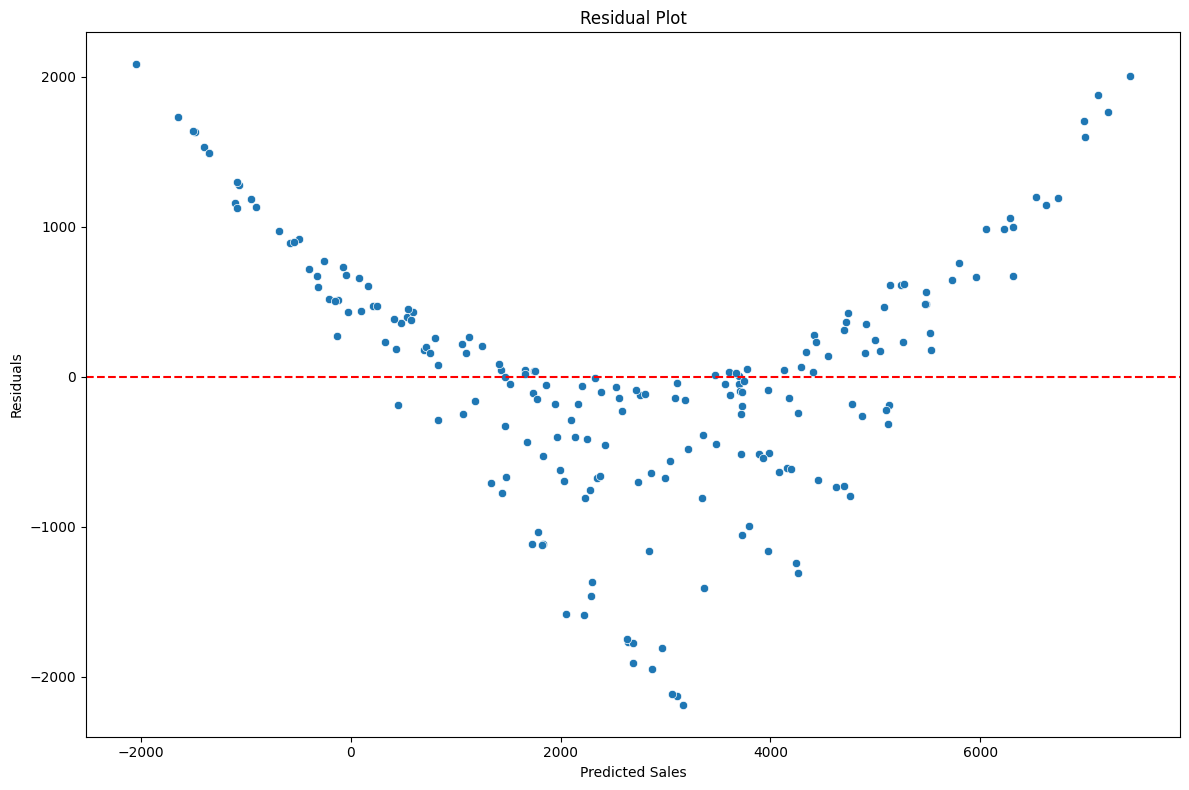

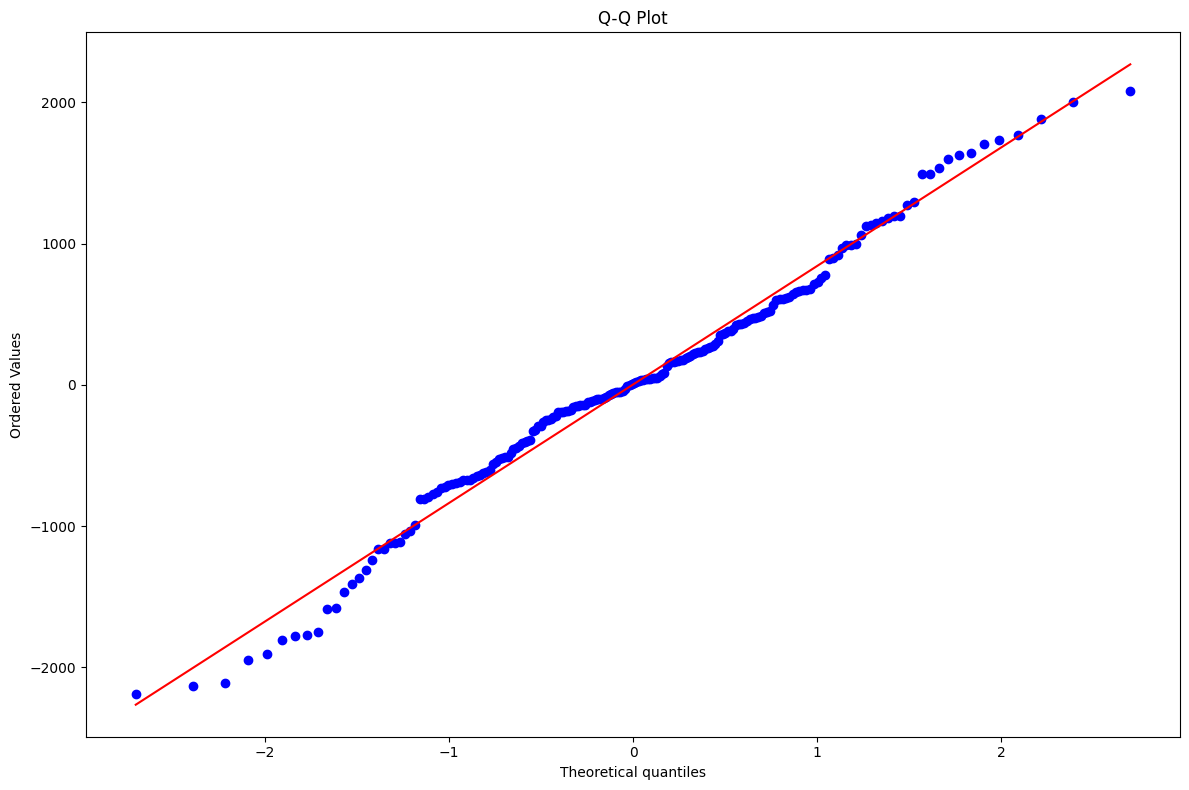

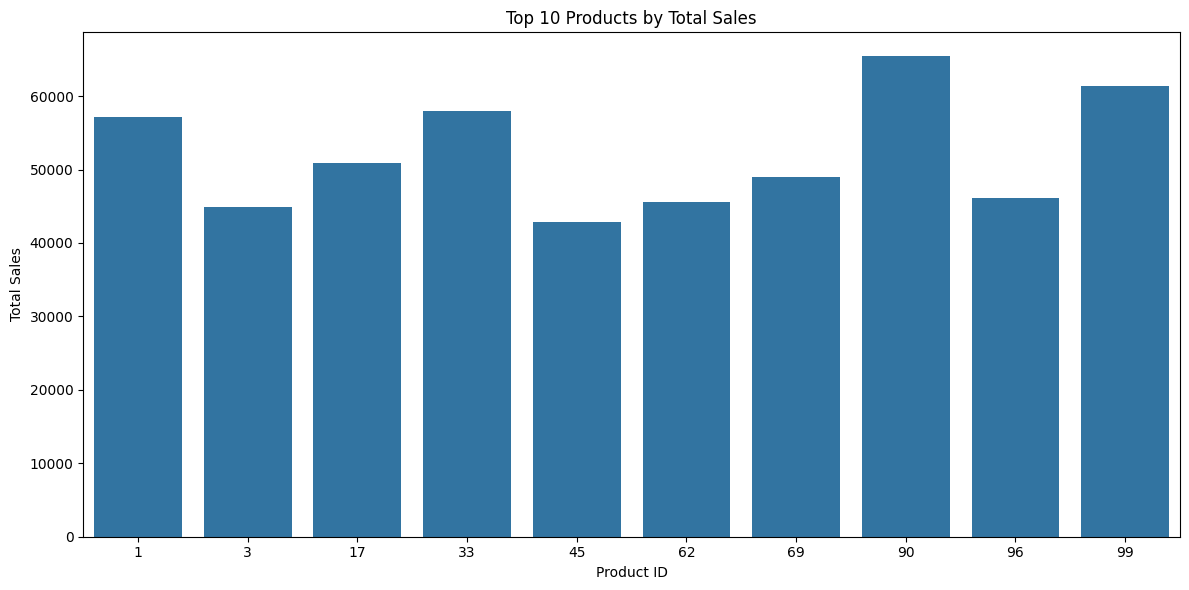


Additional Insights:
Total number of unique customers: 428
Total number of unique products: 100
Average order value: $2817.90
Most popular category: Electronics


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

def load_data(file_path='eommerce_data_1000_samples.csv'):
    """Load data from CSV file."""
    return pd.read_csv(file_path, parse_dates=['date'])

def preprocess_data(df):
    """Preprocess the data."""
    df['total_sales'] = df['price'] * df['quantity']
    df['month'] = df['date'].dt.to_period('M')
    return df

def visualize_sales_trend(df):
    """Visualize sales trends over time."""
    monthly_sales = df.groupby('month')['total_sales'].sum().reset_index()
    monthly_sales['month'] = monthly_sales['month'].astype(str)

    plt.figure(figsize=(15, 6))
    sns.lineplot(data=monthly_sales, x='month', y='total_sales')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def analyze_category_sales(df):
    """Analyze sales by category."""
    category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_sales.index, y=category_sales.values)
    plt.title('Total Sales by Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()

def perform_customer_segmentation(df):
    """Perform customer segmentation using K-means clustering."""
    customer_data = df.groupby('customer_id').agg({
        'total_sales': 'sum',
        'quantity': 'sum',
        'rating': 'mean'
    }).reset_index()

    scaler = StandardScaler()
    customer_data_scaled = scaler.fit_transform(customer_data.drop('customer_id', axis=1))

    kmeans = KMeans(n_clusters=3, random_state=42)
    customer_data['cluster'] = kmeans.fit_predict(customer_data_scaled)

    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=customer_data, x='total_sales', y='quantity', hue='cluster', size='rating', palette='viridis')
    plt.title('Customer Segmentation')
    plt.xlabel('Total Sales')
    plt.ylabel('Total Quantity')
    plt.tight_layout()
    plt.show()

    return customer_data

def perform_regression_analysis(df):
    """Perform regression analysis to predict sales."""
    X = df[['price', 'rating', 'quantity']]
    y = df['total_sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    print("Regression Model Coefficients:")
    print(f"Price (β₁): {model.coef_[0]:.2f}")
    print(f"Rating (β₂): {model.coef_[1]:.2f}")
    print(f"Quantity (β₃): {model.coef_[2]:.2f}")
    print(f"Intercept (β₀): {model.intercept_:.2f}")

    r_squared = model.score(X_test, y_test)
    print(f"R-squared: {r_squared:.4f}")

    return model, X_test, y_test

def analyze_residuals(model, X_test, y_test):
    """Analyze residuals of the regression model."""
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    mse = np.mean(residuals**2)
    rmse = np.sqrt(mse)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Sales")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 8))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot")
    plt.tight_layout()
    plt.show()

def analyze_product_performance(df):
    """Analyze product performance."""
    product_performance = df.groupby('product_id').agg({
        'total_sales': 'sum',
        'quantity': 'sum',
        'rating': 'mean'
    }).sort_values('total_sales', ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=product_performance.index, y=product_performance['total_sales'])
    plt.title('Top 10 Products by Total Sales')
    plt.xlabel('Product ID')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()

def main():
    # Load and preprocess data
    df = load_data('data.csv')
    df = preprocess_data(df)

    # Perform analyses
    visualize_sales_trend(df)
    analyze_category_sales(df)
    customer_segments = perform_customer_segmentation(df)
    model, X_test, y_test = perform_regression_analysis(df)
    analyze_residuals(model, X_test, y_test)
    analyze_product_performance(df)

    # Additional insights
    print("\nAdditional Insights:")
    print(f"Total number of unique customers: {df['customer_id'].nunique()}")
    print(f"Total number of unique products: {df['product_id'].nunique()}")
    print(f"Average order value: ${df.groupby('customer_id')['total_sales'].mean().mean():.2f}")
    print(f"Most popular category: {df['category'].value_counts().index[0]}")

if __name__ == "__main__":
    main()